In [1]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

from scripts.model import Model
from scripts.data import Data

################### GENERATE DATASETS ###################

d = Data()
train_input, train_target, train_classes, test_input, test_target, test_classes = d.get_data_flatten()

#########################################################

/home/niccolo/anaconda3/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/niccolo/anaconda3/lib/python3.6/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/niccolo/anaconda3/lib/python3.6/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/niccolo/anaconda3/lib/python3.6/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


  Epoch    |   Train loss - Accuracy   |   Dev. loss - Accuracy   
    1      |    2484.2017 - 44.20%     |    2218.1287 - 44.10%    
    2      |    2423.5471 - 44.40%     |    2160.8118 - 44.10%    
    3      |    2365.5977 - 44.60%     |    2106.1831 - 44.10%    
    4      |    2310.2305 - 44.30%     |    2054.1172 - 44.20%    
    5      |    2257.3286 - 44.40%     |    2004.4950 - 43.70%    
    6      |    2206.7803 - 44.40%     |    1957.2031 - 43.40%    
    7      |    2158.4788 - 44.50%     |    1912.1327 - 43.60%    
    8      |    2112.3220 - 44.40%     |    1869.1803 - 44.00%    
    9      |    2068.2136 - 44.90%     |    1828.2476 - 44.40%    
    10     |    2026.0601 - 44.60%     |    1789.2399 - 44.20%    
    11     |    1985.7728 - 45.00%     |    1752.0676 - 44.50%    
    12     |    1947.2676 - 45.00%     |    1716.6451 - 44.70%    
    13     |    1910.4635 - 45.10%     |    1682.8904 - 44.50%    
    14     |    1875.2834 - 45.10%     |    1650.7257 - 44.50%

   129     |    1051.3741 - 47.90%     |     976.6856 - 44.10%    
   130     |    1050.3514 - 47.90%     |     975.9989 - 44.00%    
   131     |    1049.3370 - 47.90%     |     975.3141 - 44.00%    
   132     |    1048.3307 - 47.80%     |     974.6310 - 44.00%    
   133     |    1047.3320 - 47.80%     |     973.9494 - 44.10%    
   134     |    1046.3407 - 47.80%     |     973.2690 - 44.00%    
   135     |    1045.3566 - 47.80%     |     972.5900 - 44.20%    
   136     |    1044.3793 - 47.80%     |     971.9120 - 44.30%    
   137     |    1043.4086 - 47.60%     |     971.2349 - 44.30%    
   138     |    1042.4442 - 47.70%     |     970.5585 - 44.30%    
   139     |    1041.4860 - 47.70%     |     969.8829 - 44.30%    
   140     |    1040.5337 - 47.70%     |     969.2079 - 44.40%    
   141     |    1039.5869 - 47.80%     |     968.5334 - 44.30%    
   142     |    1038.6458 - 47.80%     |     967.8593 - 44.30%    
   143     |    1037.7098 - 47.70%     |     967.1855 - 44.10%

   218     |     975.4604 - 48.00%     |     916.1426 - 44.70%    
   219     |     974.6928 - 48.00%     |     915.4611 - 44.70%    
   220     |     973.9264 - 48.00%     |     914.7800 - 44.70%    
   221     |     973.1611 - 48.00%     |     914.0992 - 44.70%    
   222     |     972.3969 - 48.00%     |     913.4188 - 44.70%    
   223     |     971.6339 - 48.00%     |     912.7387 - 44.70%    
   224     |     970.8719 - 48.00%     |     912.0590 - 44.70%    
   225     |     970.1112 - 48.00%     |     911.3796 - 44.70%    
   226     |     969.3515 - 48.00%     |     910.7006 - 44.70%    
   227     |     968.5930 - 48.00%     |     910.0220 - 44.70%    
   228     |     967.8355 - 48.00%     |     909.3438 - 44.70%    
   229     |     967.0792 - 48.00%     |     908.6661 - 44.70%    
   230     |     966.3240 - 48.00%     |     907.9888 - 44.70%    
   231     |     965.5699 - 48.00%     |     907.3118 - 44.80%    
   232     |     964.8168 - 48.10%     |     906.6354 - 44.80%

   307     |     911.2009 - 48.10%     |     857.6597 - 44.60%    
   308     |     910.5219 - 48.10%     |     857.0340 - 44.60%    
   309     |     909.8438 - 48.10%     |     856.4091 - 44.60%    
   310     |     909.1665 - 48.10%     |     855.7850 - 44.60%    
   311     |     908.4902 - 48.10%     |     855.1617 - 44.60%    
   312     |     907.8148 - 48.10%     |     854.5391 - 44.60%    
   313     |     907.1403 - 48.10%     |     853.9174 - 44.60%    
   314     |     906.4666 - 48.10%     |     853.2963 - 44.60%    
   315     |     905.7938 - 48.10%     |     852.6761 - 44.60%    
   316     |     905.1219 - 48.10%     |     852.0567 - 44.60%    
   317     |     904.4509 - 48.10%     |     851.4380 - 44.60%    
   318     |     903.7808 - 48.10%     |     850.8201 - 44.60%    
   319     |     903.1116 - 48.10%     |     850.2030 - 44.60%    
   320     |     902.4432 - 48.10%     |     849.5866 - 44.60%    
   321     |     901.7757 - 48.10%     |     848.9711 - 44.60%

   400     |     851.6902 - 48.10%     |     802.7776 - 45.10%    
   401     |     851.0881 - 48.10%     |     802.2230 - 45.10%    
   402     |     850.4869 - 48.10%     |     801.6691 - 45.10%    
   403     |     849.8864 - 48.10%     |     801.1160 - 45.10%    
   404     |     849.2866 - 48.10%     |     800.5635 - 45.10%    
   405     |     848.6876 - 48.10%     |     800.0118 - 45.10%    
   406     |     848.0894 - 48.10%     |     799.4609 - 45.10%    
   407     |     847.4920 - 48.20%     |     798.9106 - 45.10%    
   408     |     846.8953 - 48.20%     |     798.3611 - 45.10%    
   409     |     846.2993 - 48.20%     |     797.8123 - 45.10%    
   410     |     845.7041 - 48.20%     |     797.2642 - 45.10%    
   411     |     845.1097 - 48.20%     |     796.7168 - 45.10%    
   412     |     844.5160 - 48.20%     |     796.1701 - 45.10%    
   413     |     843.9230 - 48.20%     |     795.6241 - 45.10%    
   414     |     843.3308 - 48.20%     |     795.0790 - 45.10%

   507     |     791.3596 - 48.40%     |     747.3519 - 45.00%    
   508     |     790.8325 - 48.40%     |     746.8691 - 45.00%    
   509     |     790.3060 - 48.50%     |     746.3870 - 45.00%    
   510     |     789.7800 - 48.50%     |     745.9055 - 45.00%    
   511     |     789.2548 - 48.50%     |     745.4246 - 45.00%    
   512     |     788.7302 - 48.50%     |     744.9442 - 45.00%    
   513     |     788.2062 - 48.40%     |     744.4645 - 45.00%    
   514     |     787.6829 - 48.40%     |     743.9854 - 45.00%    
   515     |     787.1602 - 48.40%     |     743.5069 - 45.00%    
   516     |     786.6381 - 48.40%     |     743.0290 - 45.00%    
   517     |     786.1166 - 48.40%     |     742.5517 - 45.00%    
   518     |     785.5958 - 48.40%     |     742.0750 - 45.00%    
   519     |     785.0756 - 48.40%     |     741.5989 - 45.00%    
   520     |     784.5560 - 48.40%     |     741.1235 - 45.00%    
   521     |     784.0371 - 48.40%     |     740.6486 - 45.00%

   600     |     744.9384 - 48.40%     |     704.9513 - 45.40%    
   601     |     744.4665 - 48.40%     |     704.5214 - 45.40%    
   602     |     743.9951 - 48.40%     |     704.0921 - 45.40%    
   603     |     743.5243 - 48.40%     |     703.6632 - 45.40%    
   604     |     743.0540 - 48.40%     |     703.2349 - 45.40%    
   605     |     742.5842 - 48.40%     |     702.8071 - 45.40%    
   606     |     742.1151 - 48.40%     |     702.3799 - 45.40%    
   607     |     741.6464 - 48.40%     |     701.9532 - 45.40%    
   608     |     741.1783 - 48.40%     |     701.5269 - 45.40%    
   609     |     740.7108 - 48.40%     |     701.1013 - 45.40%    
   610     |     740.2438 - 48.40%     |     700.6761 - 45.30%    
   611     |     739.7773 - 48.40%     |     700.2514 - 45.30%    
   612     |     739.3114 - 48.40%     |     699.8273 - 45.30%    
   613     |     738.8460 - 48.40%     |     699.4036 - 45.30%    
   614     |     738.3812 - 48.40%     |     698.9805 - 45.30%

   697     |     701.6002 - 48.70%     |     665.5759 - 45.30%    
   698     |     701.1779 - 48.70%     |     665.1931 - 45.30%    
   699     |     700.7559 - 48.70%     |     664.8108 - 45.30%    
   700     |     700.3345 - 48.70%     |     664.4289 - 45.30%    
   701     |     699.9135 - 48.70%     |     664.0475 - 45.30%    
   702     |     699.4930 - 48.70%     |     663.6665 - 45.30%    
   703     |     699.0729 - 48.70%     |     663.2860 - 45.30%    
   704     |     698.6534 - 48.70%     |     662.9059 - 45.30%    
   705     |     698.2343 - 48.70%     |     662.5263 - 45.30%    
   706     |     697.8157 - 48.70%     |     662.1471 - 45.30%    
   707     |     697.3975 - 48.70%     |     661.7684 - 45.30%    
   708     |     696.9799 - 48.70%     |     661.3901 - 45.30%    
   709     |     696.5626 - 48.70%     |     661.0122 - 45.30%    
   710     |     696.1459 - 48.70%     |     660.6348 - 45.30%    
   711     |     695.7296 - 48.70%     |     660.2578 - 45.30%

   795     |     662.3470 - 48.60%     |     630.0889 - 45.60%    
   796     |     661.9677 - 48.60%     |     629.7468 - 45.60%    
   797     |     661.5888 - 48.60%     |     629.4051 - 45.60%    
   798     |     661.2103 - 48.60%     |     629.0637 - 45.60%    
   799     |     660.8322 - 48.60%     |     628.7228 - 45.70%    
   800     |     660.4544 - 48.60%     |     628.3821 - 45.70%    
   801     |     660.0771 - 48.60%     |     628.0420 - 45.70%    
   802     |     659.7003 - 48.60%     |     627.7021 - 45.70%    
   803     |     659.3238 - 48.60%     |     627.3627 - 45.70%    
   804     |     658.9477 - 48.60%     |     627.0236 - 45.70%    
   805     |     658.5720 - 48.60%     |     626.6849 - 45.70%    
   806     |     658.1967 - 48.60%     |     626.3466 - 45.70%    
   807     |     657.8218 - 48.60%     |     626.0087 - 45.80%    
   808     |     657.4473 - 48.60%     |     625.6711 - 45.80%    
   809     |     657.0732 - 48.50%     |     625.3339 - 45.80%

   891     |     627.7048 - 48.30%     |     598.9089 - 45.90%    
   892     |     627.3619 - 48.30%     |     598.6009 - 46.00%    
   893     |     627.0193 - 48.30%     |     598.2933 - 46.10%    
   894     |     626.6772 - 48.30%     |     597.9860 - 46.10%    
   895     |     626.3354 - 48.30%     |     597.6790 - 46.10%    
   896     |     625.9940 - 48.30%     |     597.3723 - 46.10%    
   897     |     625.6528 - 48.30%     |     597.0660 - 46.20%    
   898     |     625.3121 - 48.30%     |     596.7600 - 46.20%    
   899     |     624.9717 - 48.30%     |     596.4543 - 46.20%    
   900     |     624.6317 - 48.30%     |     596.1490 - 46.20%    
   901     |     624.2919 - 48.30%     |     595.8440 - 46.20%    
   902     |     623.9526 - 48.30%     |     595.5393 - 46.20%    
   903     |     623.6136 - 48.30%     |     595.2349 - 46.20%    
   904     |     623.2749 - 48.30%     |     594.9309 - 46.20%    
   905     |     622.9366 - 48.30%     |     594.6272 - 46.20%

   987     |     596.3306 - 48.20%     |     570.7786 - 46.40%    
   988     |     596.0195 - 48.20%     |     570.5001 - 46.40%    
   989     |     595.7086 - 48.20%     |     570.2219 - 46.40%    
   990     |     595.3981 - 48.20%     |     569.9440 - 46.40%    
   991     |     595.0878 - 48.20%     |     569.6663 - 46.40%    
   992     |     594.7779 - 48.20%     |     569.3890 - 46.40%    
   993     |     594.4683 - 48.20%     |     569.1119 - 46.40%    
   994     |     594.1590 - 48.30%     |     568.8351 - 46.40%    
   995     |     593.8500 - 48.30%     |     568.5587 - 46.40%    
   996     |     593.5413 - 48.30%     |     568.2824 - 46.40%    
   997     |     593.2328 - 48.30%     |     568.0065 - 46.30%    
   998     |     592.9247 - 48.30%     |     567.7308 - 46.30%    
   999     |     592.6170 - 48.30%     |     567.4554 - 46.30%    
   1000    |     592.3095 - 48.30%     |     567.1804 - 46.30%    


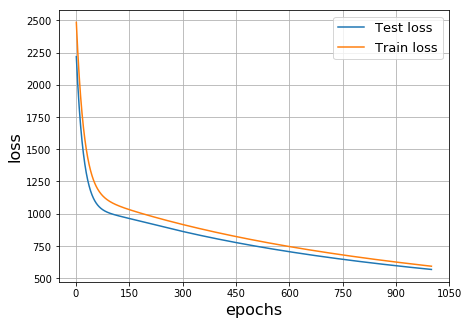

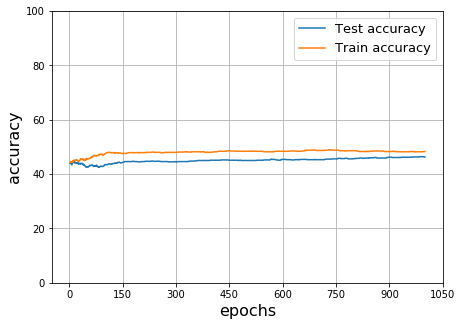

In [6]:
###################### 1. LINEAR MODEL #####################
# from scripts.model import compute_accuracy 

# Give weight to each pixel (this weight is taken from gradient descent)
class LinearRegression(Model):

    def __init__(self, features_in=392, features_out=1, optimizer=optim.SGD, criterion=nn.MSELoss, learning_rate=1e-4):
        super(LinearRegression, self).__init__()
        self.init_params = {
            'features_in': features_in,
            'features_out': features_out,
            'optimizer': optimizer,
            'criterion': criterion,
            'learning_rate': learning_rate
        }
        self.classifier = nn.Sequential(
            nn.Linear(features_in, features_out)
        )
        self.optimizer = optimizer(self.parameters(), lr=learning_rate)
        self.criterion = criterion()

    def forward(self, x):

        # flatten the features for the linear layer in the classifier
        x = x.view(1000, -1)
        return self.classifier(x) # return predicted value

# Train the model
torch.manual_seed(1)
model_linear = LinearRegression(learning_rate=1e-8)

# print('train acc {:3.2f}% test acc {:3.2f}%'.format(
#     compute_accuracy(model_linear(train_input), train_target), 
#     compute_accuracy(model_linear(test_input), test_target))
#      )
model_linear.fit(
    train_input, train_target,
    test_input, test_target,
    epochs=1000,
    doPrint=True
)

model_linear.plot_history()

  Epoch    |   Train loss - Accuracy   |   Dev. loss - Accuracy   
    1      |      0.5384 - 45.30%      |      0.5218 - 46.40%     
    2      |      0.5172 - 47.60%      |      0.5048 - 48.90%     
    3      |      0.5016 - 49.10%      |      0.4998 - 49.60%     
    4      |      0.4861 - 50.60%      |      0.4875 - 50.80%     
    5      |      0.4737 - 51.80%      |      0.4807 - 50.90%     
    6      |      0.4693 - 52.50%      |      0.4768 - 51.70%     
    7      |      0.4630 - 53.30%      |      0.4751 - 52.10%     
    8      |      0.4568 - 53.80%      |      0.4717 - 52.50%     
    9      |      0.4379 - 55.70%      |      0.4597 - 53.80%     
    10     |      0.4327 - 56.40%      |      0.4554 - 54.10%     
    11     |      0.4346 - 56.00%      |      0.4296 - 56.40%     
    12     |      0.4245 - 57.30%      |      0.4409 - 55.60%     
    13     |      0.4250 - 57.20%      |      0.4520 - 54.30%     
    14     |      0.4246 - 57.10%      |      0.4321 - 56.40% 

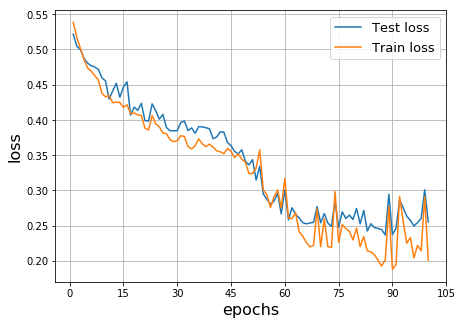

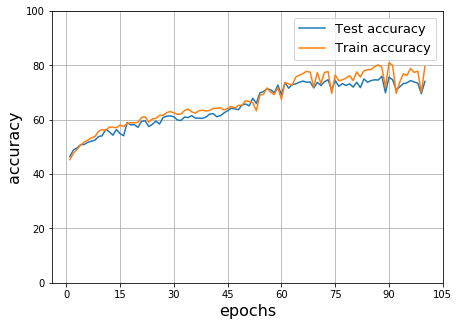

In [9]:
#################### 2. LOGISTIC MODEL #####################
class LogisticRegression(Model):

    def __init__(self, features_in=392, features_out=1, optimizer=optim.SGD, criterion=nn.MSELoss, learning_rate=1e-2):
        super(LogisticRegression, self).__init__()
        self.init_params = {
            'features_in': features_in,
            'features_out': features_out,
            'optimizer': optimizer,
            'criterion': criterion,
            'learning_rate': learning_rate
        }
        self.classifier = nn.Sequential(
            nn.Linear(features_in, features_out)
        )
        self.optimizer = optimizer(self.parameters(), lr=learning_rate)
        self.criterion = criterion()

    def forward(self, x):

        # flatten the features for the linear layer in the classifier
        x = x.view(1000, -1)
        return F.sigmoid(self.classifier(x)) # return predicted value

# Train the model
torch.manual_seed(1)
model_logistic = LogisticRegression(learning_rate=1e-2)

model_logistic.fit(
    train_input, train_target,
    test_input, test_target,
    epochs=100,
    doPrint=True
)

model_logistic.plot_history()

In [ ]:
################## 3. NEURAL NET MODEL #####################
elif(model == 3):
    print("eh")

In [ ]:
############## 4. NEURAL NET MODEL(2 LOSSES) ###############
elif(model == 4):
    print("eh")

In [ ]:
############ 5. CONVOLUTIONAL NEURAL NETWORK ###############
train_input, train_target, train_classes, test_input, test_target, test_classes = d.get_data_3dCNN()
# # add padding to keep input dimensions
# a = nn.Conv3d(1, 32, kernel_size=(1, 3, 3), padding=(0, 1, 1))

# # simply add another dimension (as expected from Conv3d)
# X = train_input.unsqueeze(1)
# # a(X).shape --> 32 filters => in the second dimensions we have 32 "strati" ognuno calcolato da un filtro

class CNNModel1Loss(Model):
    """
    Predicts whether the first image is <= than the second. Only one loss can be applied to the output of this model.
    Input: (N, 2, 14, 14)
    Output: (N, 1)
    """
    def __init__(self,
        # cambiare output_size per decidere quante classi vuoi in output. Per l'altro modello con 2 losses
        # passare semplicemente output_size=21 invece che implementare un altra classe
        output_size=1, optimizer = torch.optim.Adam, criterion = torch.nn.MSELoss):

        super(CNNModel1Loss, self).__init__()

        self.init_params = {
            'optimizer': optimizer,
            'criterion': criterion
        }

        self.feature_extractor = nn.Sequential(
            nn.BatchNorm3d(1),

            nn.Conv3d(1, 32, kernel_size=(1, 5, 5), padding=(0, 2, 2)),
            nn.ReLU(),
            nn.BatchNorm3d(32),

            nn.Conv3d(32, 16, kernel_size=(1, 3, 3), padding=(0, 1, 1)),
            nn.ReLU(),
            nn.BatchNorm3d(16),

            nn.Conv3d(16, 8, kernel_size=(1, 3, 3), padding=(0, 1, 1), stride=(1, 2, 2)),
            nn.ReLU(),
            nn.BatchNorm3d(8),
        )

        self.classifier = nn.Sequential(
            nn.Linear(8 * 2 * 7 * 7, 256),
            nn.ReLU(),
            nn.Linear(256, output_size),
            nn.Tanh() # or sigmoid (TODO: attenzione al target durante il train con la sigmoid)
        )

        self.optimizer = optimizer(self.parameters())
        self.criterion = criterion()

    def forward(self, X):
        if len(X.shape) == 4:
            # Conv3d expects an input of shape (N, C_{in}, D, H, W)
            X = X.unsqueeze(1)

        features = self.feature_extractor(X)

        # flatten the features for the linear layer in the classifier
        features = features.view(1000, -1)
        return self.classifier(features)

model_cnn1 = CNNModel1Loss()
torch.manual_seed(1)
model_cnn1.fit(
    train_input, train_target,
    test_input, test_target,
    epochs=50,
    doPrint=True
)

model_cnn1.plot_history()

In [ ]:
############ 6. CONVOLUTIONAL NEURAL NETWORK (2 losses) ###############
